In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud

In [2]:
url = 'https://www.treksandtrails.org/blog/treksandtrails-list-of-forts-of-maharashtra/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

rows= soup.find("div",class_ ="textwidget custom-html-widget").find_all('table')

rows
#print(soup.find_all('table'))
soup.findAll('table')[0].findAll('tr')[1].findAll('td')[0]

df=pd.DataFrame(columns=['Region', 'Name','Height'])

 
x=0
i=0
for i in range(24):
  region=soup.findAll('table')[i].findAll('tr')[1].findAll('td')[0].text
  x=len(soup.find_all('table')[i].findAll('tr'))

  for j in range(x):
    if j==0:
      pass
    else:
      soup.findAll('table')[i].findAll('tr')[j]
      df.loc[len(df.index)] = [region, soup.find_all('table')[i].findAll('tr')[j].findAll('td')[2].text,soup.find_all('table')[i].findAll('tr')[j].findAll('td')[3].text.replace('\'','')]
      
    
df

In [ ]:
df.isnull().sum()

In [ ]:
df1 = df.sort_values(by=["Height"])
df1.tail(16)

In [ ]:
#df2 = df1.iloc[:-15,:]
df2 = df1.drop(index=df1[df1['Height']=='NA'].index)
df2

In [ ]:
df2.dtypes

In [ ]:
df2["Height"] = pd.to_numeric(df2["Height"])
df2

In [ ]:
df3 = df2.sort_values(by=["Height"])
df3.tail(15)

In [ ]:
df3.to_csv("TrekHeight.csv")

In [3]:
ddf=pd.read_csv(r'TrekHeight.csv')
ddf

,Region,Name,Height
0,KARJAT,Sankshi Fort,800
1,ROHA,Avchitgad,977
2,DHULE,Songir fort,997
3,ROHA,Songiri,1000
4,ROHA,Tala Fort,1000
...,...,...,...
158,IGATPURI,Mandan***,4841
159,IGATPURI,Alang***,4852
160,BAGLAN,Salota Fort,4986
161,BAGLAN,Salher Fort,5140


C:\Users\HP\AppData\Local\Temp/ipykernel_13656/2188192317.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  ddf['Name'] = ddf['Name'].str.replace('\*\*\*','')


{' Sankshi Fort ': 800, 'Avchitgad': 977, 'Songir fort': 997, 'Songiri': 1000, ' Tala Fort ': 1000, ' Sondai Fort ': 1200, 'Irshalgad Fort ': 1213, ' Ghosalgad Veergad ': 1222, ' Sagargad Fort ': 1357, 'Sarasgad Fort': 1433, 'Surgad Fort': 1507, 'Tandulwadi': 1524, ' Karnala Fort ': 1538, 'Peth Fort - Kothaligad Fort': 1550, 'Kaldurg': 1550, ' Peb Fort - Vikatgad  ': 1564, 'Bhupatgad': 1603, 'Mandangad': 1606, 'Asherigad Fort': 1680, 'Rasalgad ': 1767, 'Birwadi': 1799, 'Adsul': 1826, ' Manikgad Fort': 1876, 'Kohoj Fort': 1889, 'Laling fort': 1945, 'Galna fort': 1968, 'Kalanandigad,Pargad': 2000, 'Padar Fort': 2002, 'Tungi': 2019, 'Kurdugad': 2021, ' Sudhagad Fort - Bhorapgad': 2030, 'Gorakhgad Fort ': 2116, 'Kavlya': 2124, 'Gorakhgad Fort': 2137, 'Palgad/Paldurga': 2160, 'Hargapurgad': 2250, 'Gambhirgad': 2252, 'Chandragad Fort - Dhavlya - Arthur Seat Trel': 2257, 'Kalavantin Durg Fort': 2318, 'Prabalgad Fort': 2318, 'Dhak Bahiri Caves - Bhimgad ': 2320, 'Bhamer fort': 2443, 'Mansantos

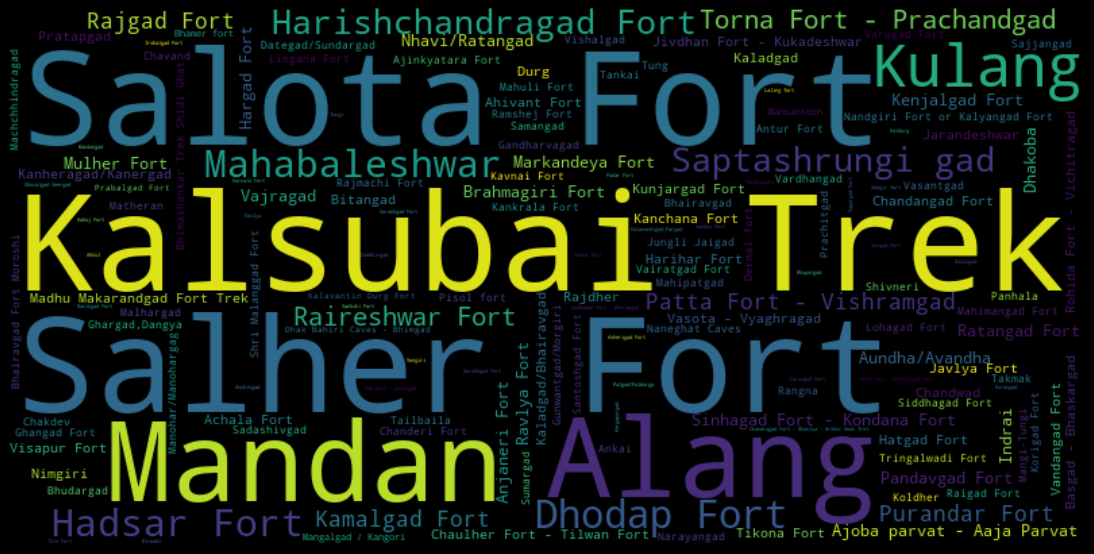

In [4]:
import matplotlib.pyplot as plt
import numpy as np


ddf['Height'] = ddf['Height'].astype('int')
ddf['Name'] = ddf['Name'].astype('str')
ddf['Name'] = ddf['Name'].str.replace('\*\*\*','')
data = ddf.set_index('Name').to_dict()['Height']
print(data)


wc = WordCloud(width=800, height=400, max_words=400).generate_from_frequencies(data)
plt.figure(figsize=(15,13), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.show()
#https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

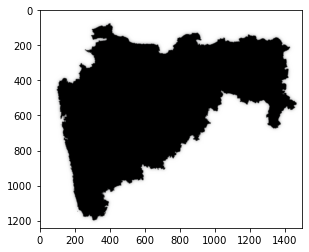

In [6]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
mht=np.array(Image.open(r'E:\Dowload till 191123\maharashtra-outline-map.PNG'))
img = Image.fromarray(mht)
img
plt.imshow(mht,interpolation='bilinear')

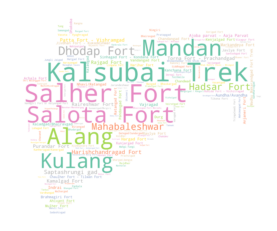

<Figure size 1080x288 with 0 Axes>

In [7]:
wc = WordCloud( max_words=200,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='white', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure().set_figwidth(15)
plt.savefig('my_fig123.png', dpi=100 * 10)

In [8]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

<Figure size 8000x6000 with 0 Axes>

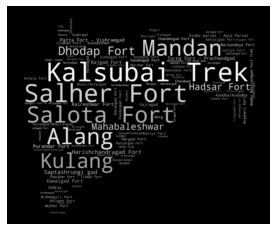

<Figure size 8000x6000 with 0 Axes>

In [9]:
wc = WordCloud( max_words=100,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='black', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(80, 60), dpi=100)